In [108]:
import pandas as pd
import plotly.express as px
import networkx as nx
import numpy as np
from tqdm import tqdm

In [2]:
train_annot_path = "../data/epic-kitchens-100-annotations/EPIC_100_train.pkl"
test_annot_path = "../data/epic-kitchens-100-annotations/EPIC_100_validation.pkl"

verb_classes = pd.read_csv("../data/epic-kitchens-100-annotations/EPIC_100_verb_classes.csv", index_col=0)
noun_classes = pd.read_csv("../data/epic-kitchens-100-annotations/EPIC_100_noun_classes.csv", index_col=0)

In [3]:
verb_classes.key

id
0         take
1          put
2         wash
3         open
4        close
        ...   
92     prepare
93        bake
94        mark
95        bend
96    unfreeze
Name: key, Length: 97, dtype: object

In [4]:
train_df = pd.read_pickle(train_annot_path)
train_df.head()

,participant_id,video_id,narration_timestamp,start_timestamp,stop_timestamp,start_frame,stop_frame,narration,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
narration_id,,,,,,,,,,,,,,
P01_01_0,P01,P01_01,00:00:01.089,00:00:00.14,00:00:03.37,8,202,open door,open,3,door,3,[door],[3]
P01_01_1,P01,P01_01,00:00:02.629,00:00:04.37,00:00:06.17,262,370,turn on light,turn-on,6,light,114,[light],[114]
P01_01_10,P01,P01_01,00:00:23.340,00:00:24.97,00:00:26.20,1498,1572,open drawer,open,3,drawer,8,[drawer],[8]
P01_01_100,P01,P01_01,00:07:57.919,00:07:59.75,00:08:00.88,28785,28852,take cup,take,0,cup,13,[cup],[13]
P01_01_101,P01,P01_01,00:08:00.020,00:08:01.47,00:08:02.21,28888,28932,open cupboard,open,3,cupboard,3,[cupboard],[3]


In [5]:
train_df["verb_class_name"] = train_df["verb_class"].map(verb_classes.key)
train_df["noun_class_name"] = train_df["noun_class"].map(noun_classes.key)
train_df["action"] = "(" + train_df["verb_class_name"] + ", " + train_df["noun_class_name"] + ")"
train_df.head()

,participant_id,video_id,narration_timestamp,start_timestamp,stop_timestamp,start_frame,stop_frame,narration,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes,verb_class_name,noun_class_name,action
narration_id,,,,,,,,,,,,,,,,,
P01_01_0,P01,P01_01,00:00:01.089,00:00:00.14,00:00:03.37,8,202,open door,open,3,door,3,[door],[3],open,cupboard,"(open, cupboard)"
P01_01_1,P01,P01_01,00:00:02.629,00:00:04.37,00:00:06.17,262,370,turn on light,turn-on,6,light,114,[light],[114],turn-on,light,"(turn-on, light)"
P01_01_10,P01,P01_01,00:00:23.340,00:00:24.97,00:00:26.20,1498,1572,open drawer,open,3,drawer,8,[drawer],[8],open,drawer,"(open, drawer)"
P01_01_100,P01,P01_01,00:07:57.919,00:07:59.75,00:08:00.88,28785,28852,take cup,take,0,cup,13,[cup],[13],take,cup,"(take, cup)"
P01_01_101,P01,P01_01,00:08:00.020,00:08:01.47,00:08:02.21,28888,28932,open cupboard,open,3,cupboard,3,[cupboard],[3],open,cupboard,"(open, cupboard)"


In [6]:
verbs = verb_classes.key
nouns = noun_classes.key


def get_cooccurrence_matrix(df, verbs, nouns):
    cooccurrence = pd.DataFrame(index=verbs, columns=nouns)
    cooccurrence = cooccurrence.fillna(0)

    for _, row in tqdm(df.iterrows(), total=len(df), desc="Building cooccurrence matrix", unit=" row(s)"):
        cooccurrence.at[row["verb_class_name"], row["noun_class_name"]] += 1

    return cooccurrence


cooccurrence = get_cooccurrence_matrix(
    df=train_df,
    verbs=verbs,
    nouns=nouns,
)

Building cooccurrence matrix: 100%|██████████| 67217/67217 [00:03<00:00, 21105.09 row(s)/s]


In [7]:
fig = px.imshow(
    cooccurrence,
    y=cooccurrence.index,
    x=cooccurrence.columns,
    title="Co-occurrence of verb-noun pairs in training set",
    width=1200,
    height=1200,
    color_continuous_scale=["white", "purple"],
    aspect="auto",
    labels={"x": "Nouns", "y": "Verbs"},
)
fig.write_image("../res/coocc/png/matrix.png", scale=2.0)
fig.show()

In [8]:
cooccurrence.index

Index(['take', 'put', 'wash', 'open', 'close', 'insert', 'turn-on', 'cut',
       'turn-off', 'pour', 'mix', 'move', 'remove', 'throw', 'dry', 'shake',
       'scoop', 'adjust', 'squeeze', 'peel', 'empty', 'press', 'flip', 'turn',
       'check', 'scrape', 'fill', 'apply', 'fold', 'scrub', 'break', 'pull',
       'pat', 'lift', 'hold', 'eat', 'wrap', 'filter', 'look', 'unroll',
       'sort', 'hang', 'sprinkle', 'rip', 'spray', 'cook', 'add', 'roll',
       'search', 'crush', 'stretch', 'knead', 'divide', 'set', 'feel', 'rub',
       'soak', 'brush', 'sharpen', 'drop', 'drink', 'slide', 'water', 'gather',
       'attach', 'turn-down', 'coat', 'transition', 'wear', 'measure',
       'increase', 'unscrew', 'wait', 'lower', 'form', 'smell', 'use', 'grate',
       'screw', 'let-go', 'finish', 'stab', 'serve', 'uncover', 'unwrap',
       'choose', 'lock', 'flatten', 'switch', 'carry', 'season', 'unlock',
       'prepare', 'bake', 'mark', 'bend', 'unfreeze'],
      dtype='object', name='key'

In [9]:
dimensions = ["verb_class_name", "noun_class_name"]

verbs = train_df["verb_class_name"]
nouns = train_df["noun_class_name"]

verbs = verbs[::-1]
nouns = nouns[::-1]

df = pd.DataFrame({"Verbs": verbs, "Nouns": nouns})
df

,Verbs,Nouns
narration_id,,
P37_103_9,break,chicken
P37_103_8,break,chicken
P37_103_73,pour,water
P37_103_72,take,pan
P37_103_71,turn-off,tap
...,...,...
P01_01_101,open,cupboard
P01_01_100,take,cup
P01_01_10,open,drawer


In [10]:
train_df["verb_class_name"].value_counts()

verb_class_name
take        14848
put         12225
wash         6927
open         4870
close        3483
            ...  
mark            3
bend            2
unfreeze        2
season          2
bake            1
Name: count, Length: 97, dtype: int64

In [11]:
import os

interesting_verbs = [
    "turn-off",
    "turn-on",
    "take",
    "put",
    "wash",
    "close",
    "open"
]

output_path = "../res/coocc"
formats = ["png", "pdf", "svg"]
for form in formats:
    os.makedirs(os.path.join(output_path, form), exist_ok=True)

for verb in interesting_verbs:
    fig = px.parallel_categories(
        train_df.loc[train_df["verb_class_name"] == verb],
        dimensions=["verb_class_name", "noun_class_name"],
        height=800,
        width=1000,
        labels={"verb_class_name": "Verb", "noun_class_name": "Noun"},
        title=f"Action co-occurrence in EK-100 training set for verb <b>{verb}</b>",
    )
    # fig.update_traces(dimensions=[None, {"categoryorder": "category descending"}])
    fig.show()

    fig.write_image(os.path.join(output_path, "png", f"{verb}_cooccurrence.png"), scale=2.0)
    fig.write_image(os.path.join(output_path, "pdf", f"{verb}_cooccurrence.pdf"))
    fig.write_image(os.path.join(output_path, "svg", f"{verb}_cooccurrence.svg"))

## Print co-occurrences V->N and N->V

In [27]:
cooccurrence

key,tap,spoon,plate,cupboard,knife,pan,lid,bowl,drawer,sponge,...,pillow,pen,face,plum,whiskey,door:kitchen,tape,camera,cd,extract:vanilla
key,,,,,,,,,,,,,,,,,,,,,
take,2,886,833,7,802,499,483,533,5,529,...,0,0,0,1,0,0,0,0,1,0
put,1,685,773,4,635,507,600,504,8,376,...,0,1,0,1,0,0,0,0,0,0
wash,19,416,549,3,490,396,163,252,0,374,...,0,0,0,0,0,0,0,0,0,0
open,9,0,6,1342,2,2,105,4,936,0,...,0,0,0,0,0,0,0,0,0,0
close,5,0,1,919,0,3,98,2,643,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
prepare,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bake,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
v_to_n = cooccurrence.div(cooccurrence.sum(axis=1), axis=0)
n_to_v = cooccurrence.div(cooccurrence.sum(axis=0), axis=1).fillna(0).T

In [138]:
n = 20


In [139]:
import matplotlib.pyplot as plt
import numpy as np


# Enable LaTeX rendering in Matplotlib
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{lmodern}"
plt.rcParams["font.family"] = "lmodern"
plt.rcParams["font.size"] = 10  # Adjust the base font size as needed

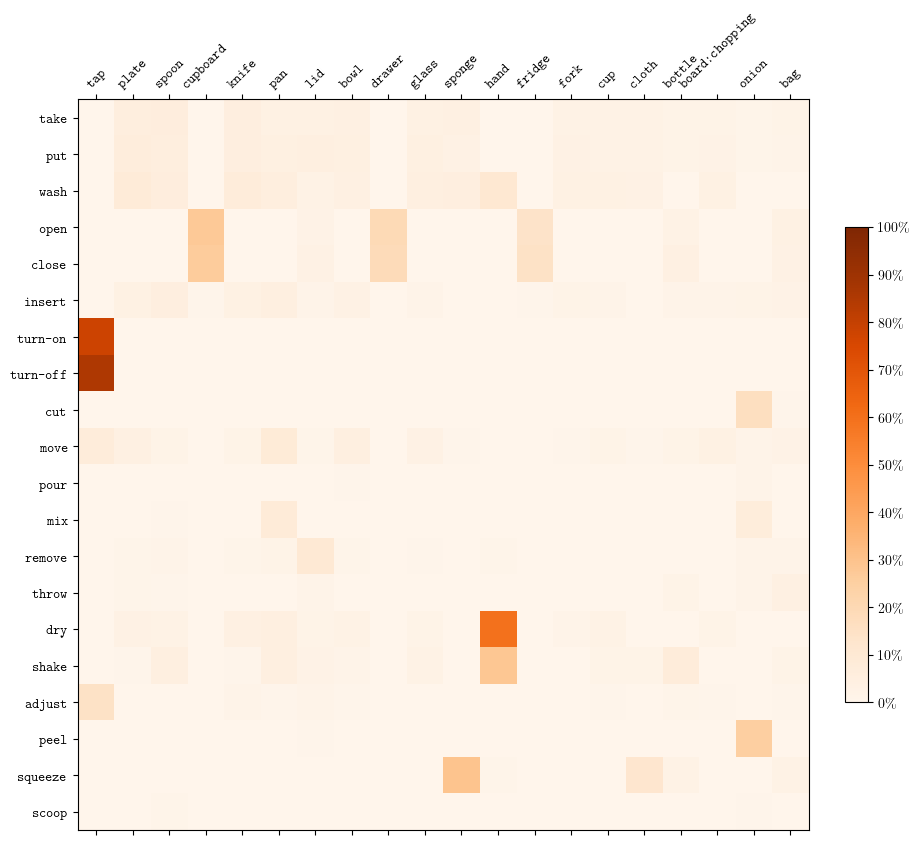

In [144]:

top_n_verbs = train_df["verb_class_name"].value_counts()[:n]
top_n_nouns = train_df["noun_class_name"].value_counts()[:n]
data = v_to_n.loc[top_n_verbs.index, top_n_nouns.index]

# Calculate figure size
fig_width, fig_height = max(20 * n, 1000), max(20 * n, 1000)
fig_size = (fig_width / 100, fig_height / 100)  # Convert pixels to inches for Matplotlib

fig, ax = plt.subplots(figsize=fig_size)
cax = ax.matshow(data, cmap="Oranges", vmin=0, vmax=1)  # Use 'Blues' colormap to match "royalblue"

# ax.set_title("Normalised verb-to-noun co-occurrence matrix")

# Set tick labels for x and y axes
ax.set_xticks(np.arange(len(data.columns)))
ax.set_xticklabels([r"\texttt{" + text + r"}" for text in data.columns], rotation=45)  # Rotate x-axis labels for better readability
ax.set_yticks(np.arange(len(data.index)))
ax.set_yticklabels([r"\texttt{" + text + r"}" for text in data.index])

# Customise the color bar to display percentage
cbar = fig.colorbar(cax, ticks=np.linspace(0, 1, 11), shrink=0.5, pad=0.04)  # Adjust the number of ticks as needed
cbar.ax.set_yticklabels([(f"{int(val*100)}\%") for val in np.linspace(0, 1, 11)])  # Set tick labels as percentages

# Adjust layout for better spacing between subplot elements
plt.tight_layout()

# Show the plot
plt.show()

# Save the figure
fig.savefig(f"../res/coocc/png/top{n}_norm_v_to_n.png", dpi=300)  # Increase dpi for higher resolution
fig.savefig(f"../res/coocc/pdf/top{n}_norm_v_to_n.pdf", dpi=300)

plt.close(fig)

# import matplotlib.pyplot as plt
# import numpy as np

# # Your existing plotting code here...
# fig, ax = plt.subplots()
# cax = ax.matshow(data, cmap="Blues", vmin=0, vmax=1)  # Example data plot

# # Add color bar with adjusted size
# cbar = fig.colorbar(cax, shrink=0.5, pad=0.04)  # Adjust 'shrink' for height, 'pad' for distance from plot
# cbar.ax.set_yticklabels([f"{int(val*100)}%" for val in np.linspace(0, 1, 11)])  # Set tick labels as percentages

# # Optionally, adjust the font size of the color bar tick labels
# cbar.ax.tick_params(labelsize=10)  # Adjust label size to your preference

# plt.show()

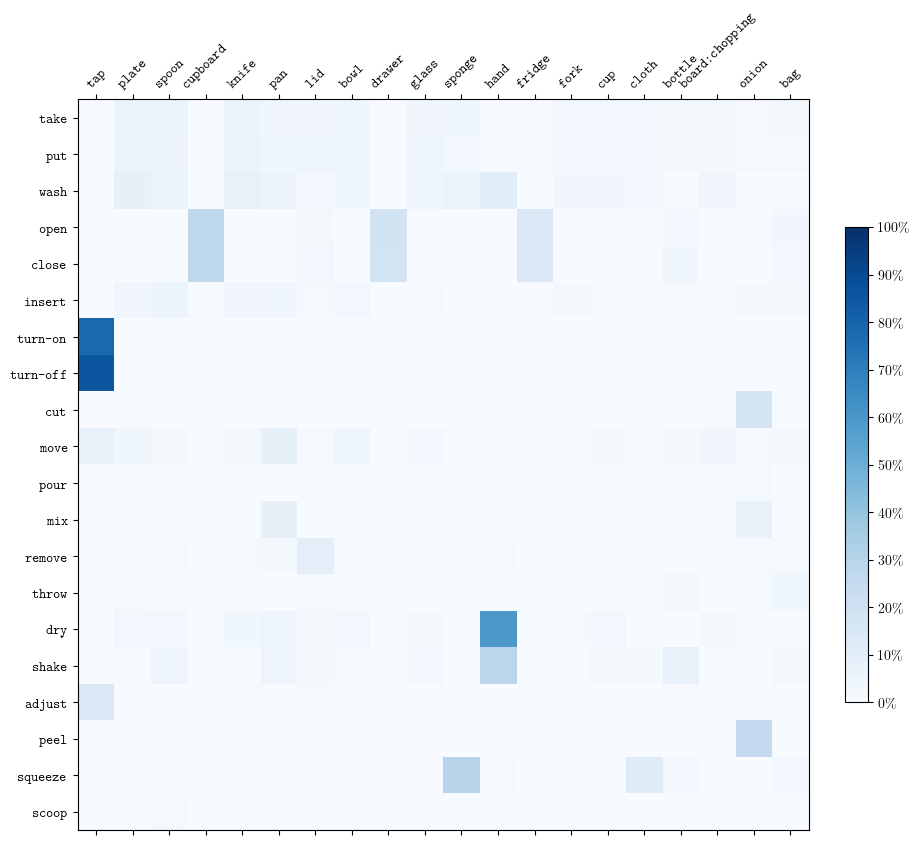

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Enable LaTeX rendering in Matplotlib
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{lmodern}"
plt.rcParams["font.family"] = "lmodern"
plt.rcParams["font.size"] = 10  # Adjust the base font size as needed

# Calculate figure size
fig_width, fig_height = max(20 * n, 1000), max(20 * n, 1000)
fig_size = (fig_width / 100, fig_height / 100)  # Convert pixels to inches for Matplotlib

fig, ax = plt.subplots(figsize=fig_size)
cax = ax.matshow(data, cmap="Blues", vmin=0, vmax=1)  # Use 'Blues' colormap to match "royalblue"

# ax.set_title("Normalised noun-to-verb co-occurrence matrix")

# Set tick labels for x and y axes
ax.set_xticks(np.arange(len(data.columns)))
ax.set_xticklabels(
    [r"\texttt{" + text + r"}" for text in data.columns], rotation=45
)  # Rotate x-axis labels for better readability
ax.set_yticks(np.arange(len(data.index)))
ax.set_yticklabels([r"\texttt{" + text + r"}" for text in data.index])

# Customise the color bar to display percentage
cbar = fig.colorbar(cax, ticks=np.linspace(0, 1, 11), shrink=0.5, pad=0.04)  # Adjust the number of ticks as needed
cbar.ax.set_yticklabels([f"{int(val*100)}\%" for val in np.linspace(0, 1, 11)])  # Set tick labels as percentages

# Adjust layout for better spacing between subplot elements
plt.tight_layout()

# Show the plot
plt.show()

# Save the figure
fig.savefig(f"../res/coocc/png/top{n}_n_to_v.png", dpi=300)  # Increase dpi for higher resolution
fig.savefig(f"../res/coocc/pdf/top{n}_n_to_v.pdf", dpi=300)

plt.close(fig)

# import matplotlib.pyplot as plt
# import numpy as np

# # Your existing plotting code here...
# fig, ax = plt.subplots()
# cax = ax.matshow(data, cmap="Blues", vmin=0, vmax=1)  # Example data plot

# # Add color bar with adjusted size
# cbar = fig.colorbar(cax, shrink=0.5, pad=0.04)  # Adjust 'shrink' for height, 'pad' for distance from plot
# cbar.ax.set_yticklabels([f"{int(val*100)}%" for val in np.linspace(0, 1, 11)])  # Set tick labels as percentages

# # Optionally, adjust the font size of the color bar tick labels
# cbar.ax.tick_params(labelsize=10)  # Adjust label size to your preference

# plt.show()